##### What is Regression?
Regression searches for relationships among variables. In other words, you need to find a function that maps some features or variables to others sufficiently well.

The dependent features are called the dependent variables, outputs, or responses.

##### What is Regression?
When implementing linear regression of some dependent variable 𝑦 on the set of independent variables 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors, you assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀. This equation is the regression equation. 𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression coefficients, and 𝜀 is the random error.

##### Simple Linear Regression.
Simple or single-variate linear regression is the simplest case of linear regression with a single independent variable, 𝐱 = 𝑥.

The following figure illustrates simple linear regression: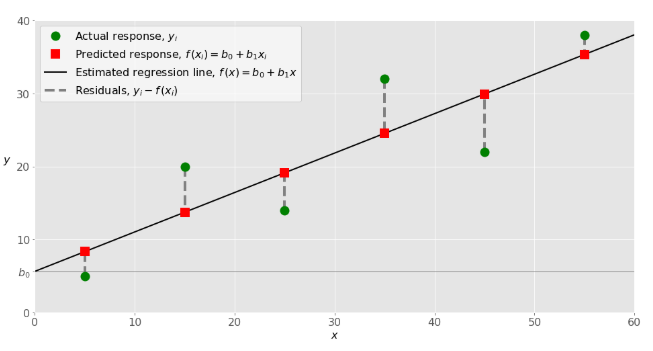

##### Multiple Linear Regression
If there are just two independent variables, the estimated regression function is 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂. It represents a regression plane in a three-dimensional space. The goal of regression is to determine the values of the weights 𝑏₀, 𝑏₁, and 𝑏₂ such that this plane is as close

##### Polynomial Regression
The simplest example of polynomial regression has a single independent variable, and the estimated regression function is a polynomial of degree 2: 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥 + 𝑏₂𝑥².

#### Model Evaluation

##### R-Squared
Very famous metric for evaluation

$R^{2} = $1 - $\frac{\displaystyle\sum_{i=1}^{i=N} (y_i - \hat{y}) ^ 2 }{\displaystyle\sum_{i=1}^{i=m} (y_i - \bar{y}) ^ 2}$

##### Adjusted R-Squared
Less prone to the number of features

$R_a^{2} = $1 - $\frac{(1 - R^2)(N-1)}{N-p-1}$

##### Simple Linear Regression With scikit-learn


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array([5, 15, 25, 35, 45, 55])
print(x.shape) # This is a rank-one array and it's very confusing to work with
# so, we will convert it
x = x.reshape(-1, 1) # -1 means choose whatever the number of rows but keep the number of columns equal to 1
print(x.shape)
y = np.array([5, 20, 14, 32, 22, 38]).reshape(-1, 1)
print(y.shape)
# Create a model
model = LinearRegression()
# Fit the model
model.fit(x, y)
# Get the R-squared
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
# find the intercept and slope
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('='*30)
# How to use your model for pridection
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
# Just to make sure, let's implement out own equation and use this for prediction
y_pred_eq = model.intercept_ + model.coef_*x
# Let's print this out
print('='*30)
print('predicted response from equation :', y_pred_eq, sep='\n')


(6,)
(6, 1)
(6, 1)
coefficient of determination: 0.7158756137479542
intercept: [5.63333333]
slope: [[0.54]]
predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]
predicted response from equation :
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [2]:
# Of course we can use our model in predicting new data points
# Let's create some
x_new = np.arange(10).reshape(-1, 1)
# Let's get out predictions
y_new = model.predict(x_new)
# print the results
y_new

array([[ 5.63333333],
       [ 6.17333333],
       [ 6.71333333],
       [ 7.25333333],
       [ 7.79333333],
       [ 8.33333333],
       [ 8.87333333],
       [ 9.41333333],
       [ 9.95333333],
       [10.49333333]])

##### Advanced Linear Regression With statsmodels

In [3]:
# Import statsmodels package
import statsmodels.api as sm
# You need to add the column of ones to the inputs if you want statsmodels to calculate the intercept 𝑏₀.
# It doesn’t takes 𝑏₀ into account by default
x = sm.add_constant(x)
# Let's print x to make sure
print(x)

[[ 1.  5.]
 [ 1. 15.]
 [ 1. 25.]
 [ 1. 35.]
 [ 1. 45.]
 [ 1. 55.]]


In [4]:
# Create model
model_sm = sm.OLS(y, x)
# Fit the model
results = model_sm.fit()
# Print regression summary 
results.summary()

c:\users\ahmed.abuelkhir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     10.08
Date:                Sun, 24 Nov 2019   Prob (F-statistic):             0.0337
Time:                        14:35:33   Log-Likelihood:                -19.071
No. Observations:                   6   AIC:                             42.14
Df Residuals:                       4   BIC:                             41.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6333      5.872      0.959      0.392     -10.670      21.936
x1             0.5400      0.170      3.175      0.034       0.068       1.012
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.606
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.651
Skew:                           0.008   Prob(JB):                        0.722
Kurtosis:                       1.387   Cond. No.                         69.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""